In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(color_codes=True)

In [2]:
listings=pd.read_csv("D:\Customer+Churn+Data.csv")

In [3]:
df=pd.DataFrame(pd.read_csv("D:\Customer+Churn+Data.csv"))

In [4]:
df.head(50)

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,20000,1,4,3.0,6.0,Debit Card,Female,3.0,3,Super,2.0,Single,9,1.0,11,1,5,160,Mobile
1,20001,1,0,1.0,8.0,UPI,Male,3.0,4,Regular Plus,3.0,Single,7,1.0,15,0,0,121,Mobile
2,20002,1,0,1.0,30.0,Debit Card,Male,2.0,4,Regular Plus,3.0,Single,6,1.0,14,0,3,NaN,Mobile
3,20003,1,0,3.0,15.0,Debit Card,Male,2.0,4,Super,5.0,Single,8,0.0,23,0,3,134,Mobile
4,20004,1,0,1.0,12.0,Credit Card,Male,2.0,3,Regular Plus,5.0,Single,3,0.0,11,1,3,130,Mobile
5,20005,1,0,1.0,22.0,Debit Card,Female,3.0,NaN,Regular Plus,5.0,Single,2,1.0,22,4,7,139,Computer
6,20006,1,2,3.0,11.0,Cash on Delivery,Male,2.0,3,Super,2.0,Divorced,4,0.0,14,0,0,121,Mobile
7,20007,1,0,1.0,6.0,Credit Card,Male,3.0,3,Regular Plus,2.0,Divorced,3,1.0,16,2,0,123,Mobile
8,20008,1,13,3.0,9.0,E wallet,Male,2.0,4,Regular Plus,3.0,Divorced,2,1.0,14,0,2,127,Mobile
9,20009,1,0,1.0,31.0,Debit Card,Male,2.0,5,Regular Plus,3.0,Single,2,0.0,12,1,1,123,Mobile


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11158 non-null  object 
 3   City_Tier                11148 non-null  float64
 4   CC_Contacted_LY          11158 non-null  float64
 5   Payment                  11151 non-null  object 
 6   Gender                   11152 non-null  object 
 7   Service_Score            11162 non-null  float64
 8   Account_user_count       11148 non-null  object 
 9   account_segment          11163 non-null  object 
 10  CC_Agent_Score           11144 non-null  float64
 11  Marital_Status           11048 non-null  object 
 12  rev_per_month            11158 non-null  object 
 13  Complain_ly              10903 non-null  float64
 14  rev_growth_yoy        

In [6]:
df.select_dtypes(include='object').nunique()

Tenure                      38
Payment                      5
Gender                       4
Account_user_count           7
account_segment              7
Marital_Status               3
rev_per_month               59
rev_growth_yoy              20
coupon_used_for_payment     20
Day_Since_CC_connect        24
cashback                   321
Login_device                 3
dtype: int64

In [7]:
df.drop(columns='AccountID', inplace=True)
df.head()

,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,1,4,3.0,6.0,Debit Card,Female,3.0,3,Super,2.0,Single,9,1.0,11,1,5,160,Mobile
1,1,0,1.0,8.0,UPI,Male,3.0,4,Regular Plus,3.0,Single,7,1.0,15,0,0,121,Mobile
2,1,0,1.0,30.0,Debit Card,Male,2.0,4,Regular Plus,3.0,Single,6,1.0,14,0,3,NaN,Mobile
3,1,0,3.0,15.0,Debit Card,Male,2.0,4,Super,5.0,Single,8,0.0,23,0,3,134,Mobile
4,1,0,1.0,12.0,Credit Card,Male,2.0,3,Regular Plus,5.0,Single,3,0.0,11,1,3,130,Mobile


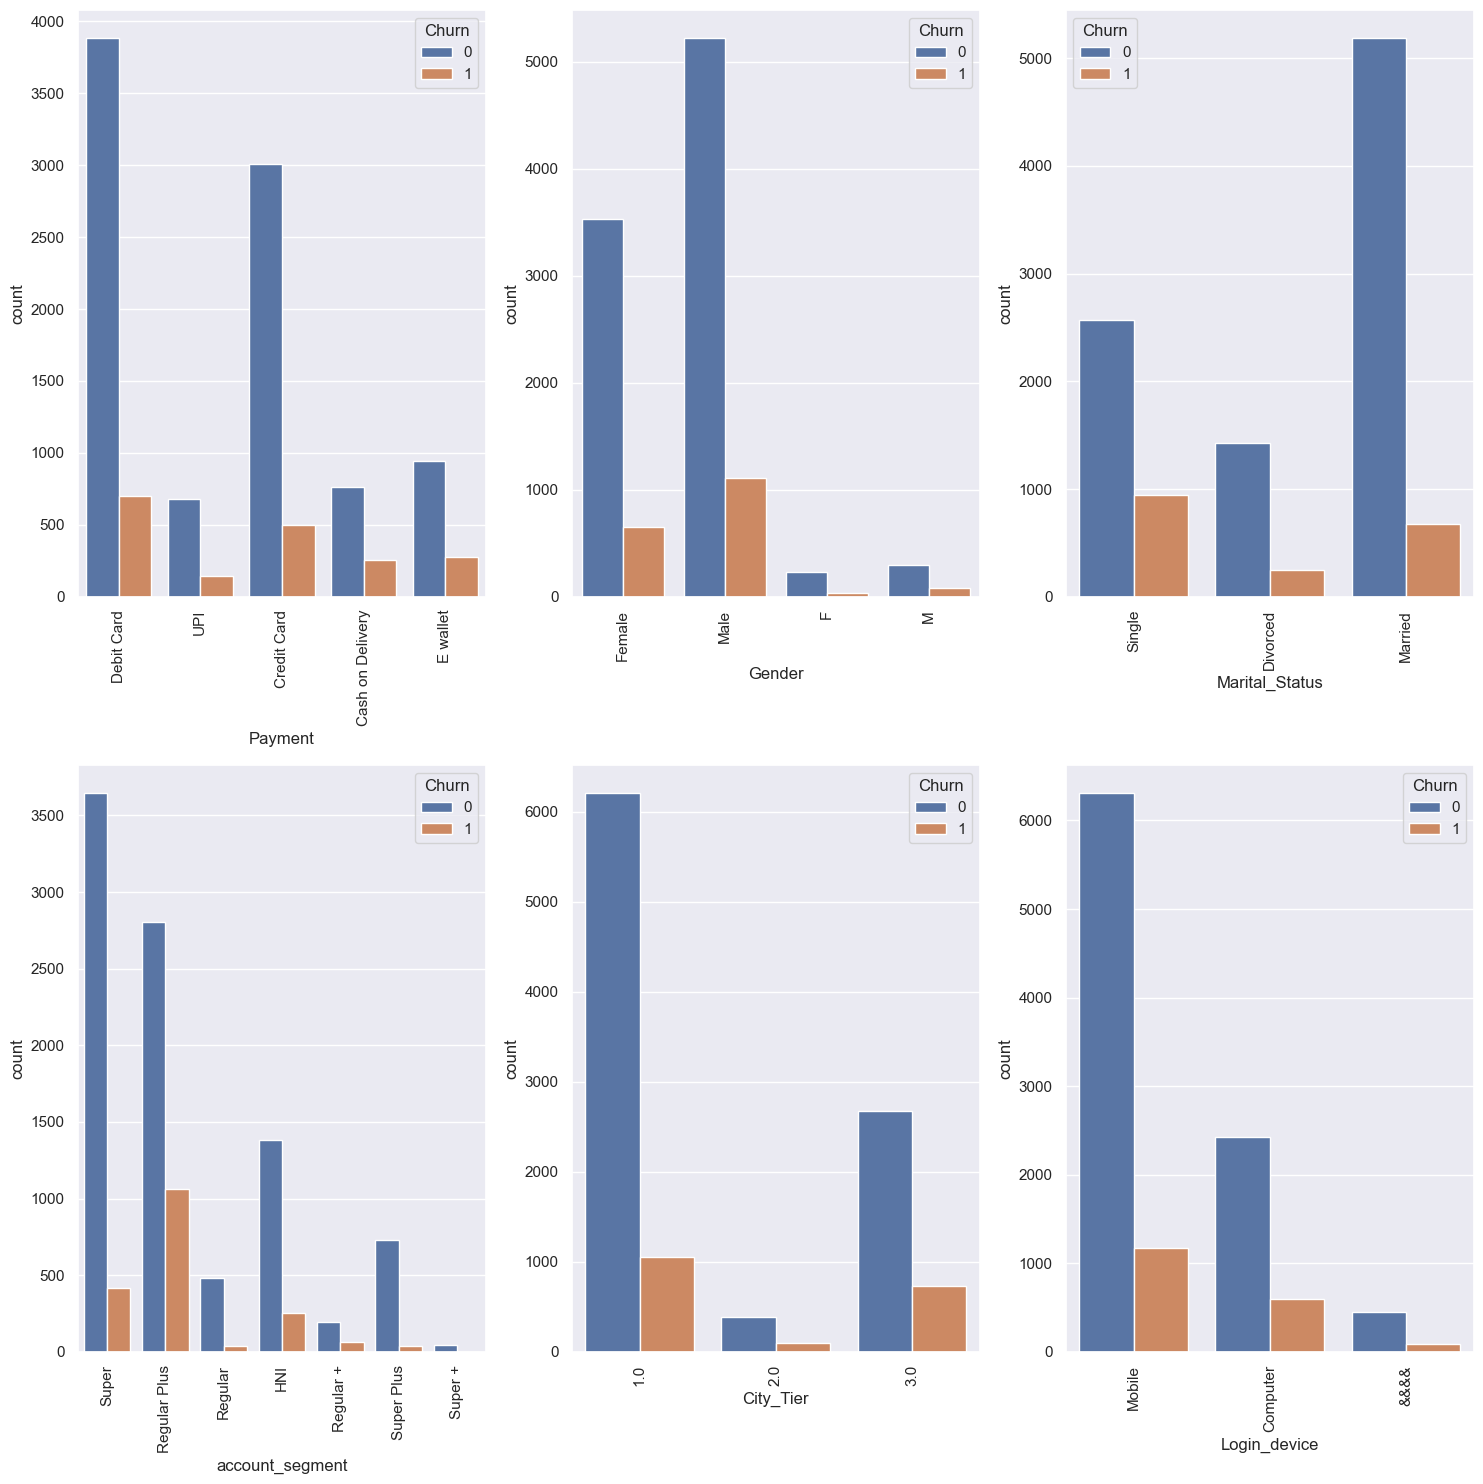

In [8]:
# list of categorical variables to plot
cat_vars = ['Payment', 'Gender', 'Marital_Status', 'account_segment', 
            'City_Tier','Login_device']

# create figure with subplots
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 15))
axs = axs.flatten()

# create barplot for each categorical variable
for i, var in enumerate(cat_vars):
    sns.countplot(x=var, hue='Churn', data=df, ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)

# adjust spacing between subplots
fig.tight_layout()

# show plot
plt.show()

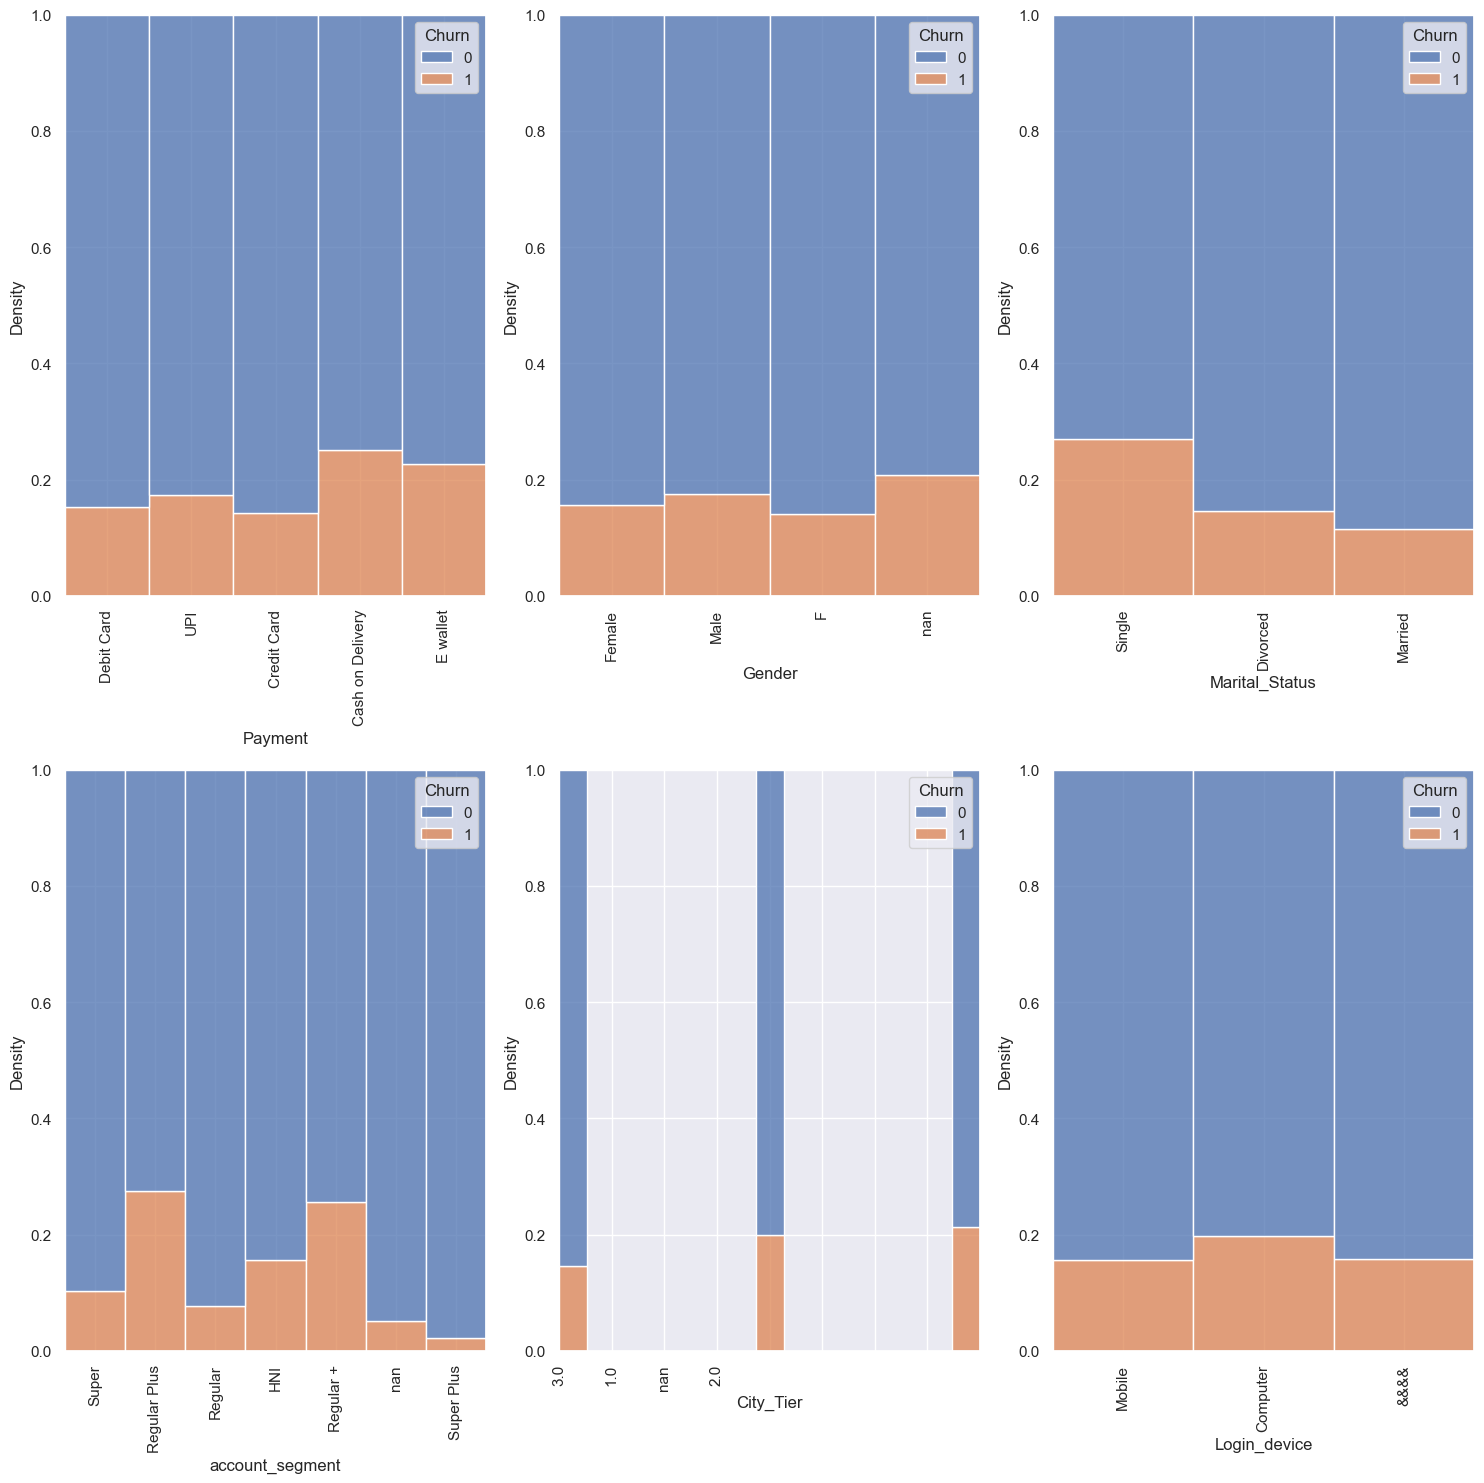

In [9]:
import warnings
warnings.filterwarnings("ignore")
# get list of categorical variables
cat_vars = ['Payment', 'Gender', 'Marital_Status', 'account_segment', 
            'City_Tier','Login_device']

# create figure with subplots
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 15))
axs = axs.flatten()

# create histplot for each categorical variable
for i, var in enumerate(cat_vars):
    sns.histplot(x=var, hue='Churn', data=df, ax=axs[i], multiple="fill", kde=False, element="bars", fill=True, stat='density')
    axs[i].set_xticklabels(df[var].unique(), rotation=90)
    axs[i].set_xlabel(var)

# adjust spacing between subplots
fig.tight_layout()

# show plot
plt.show()

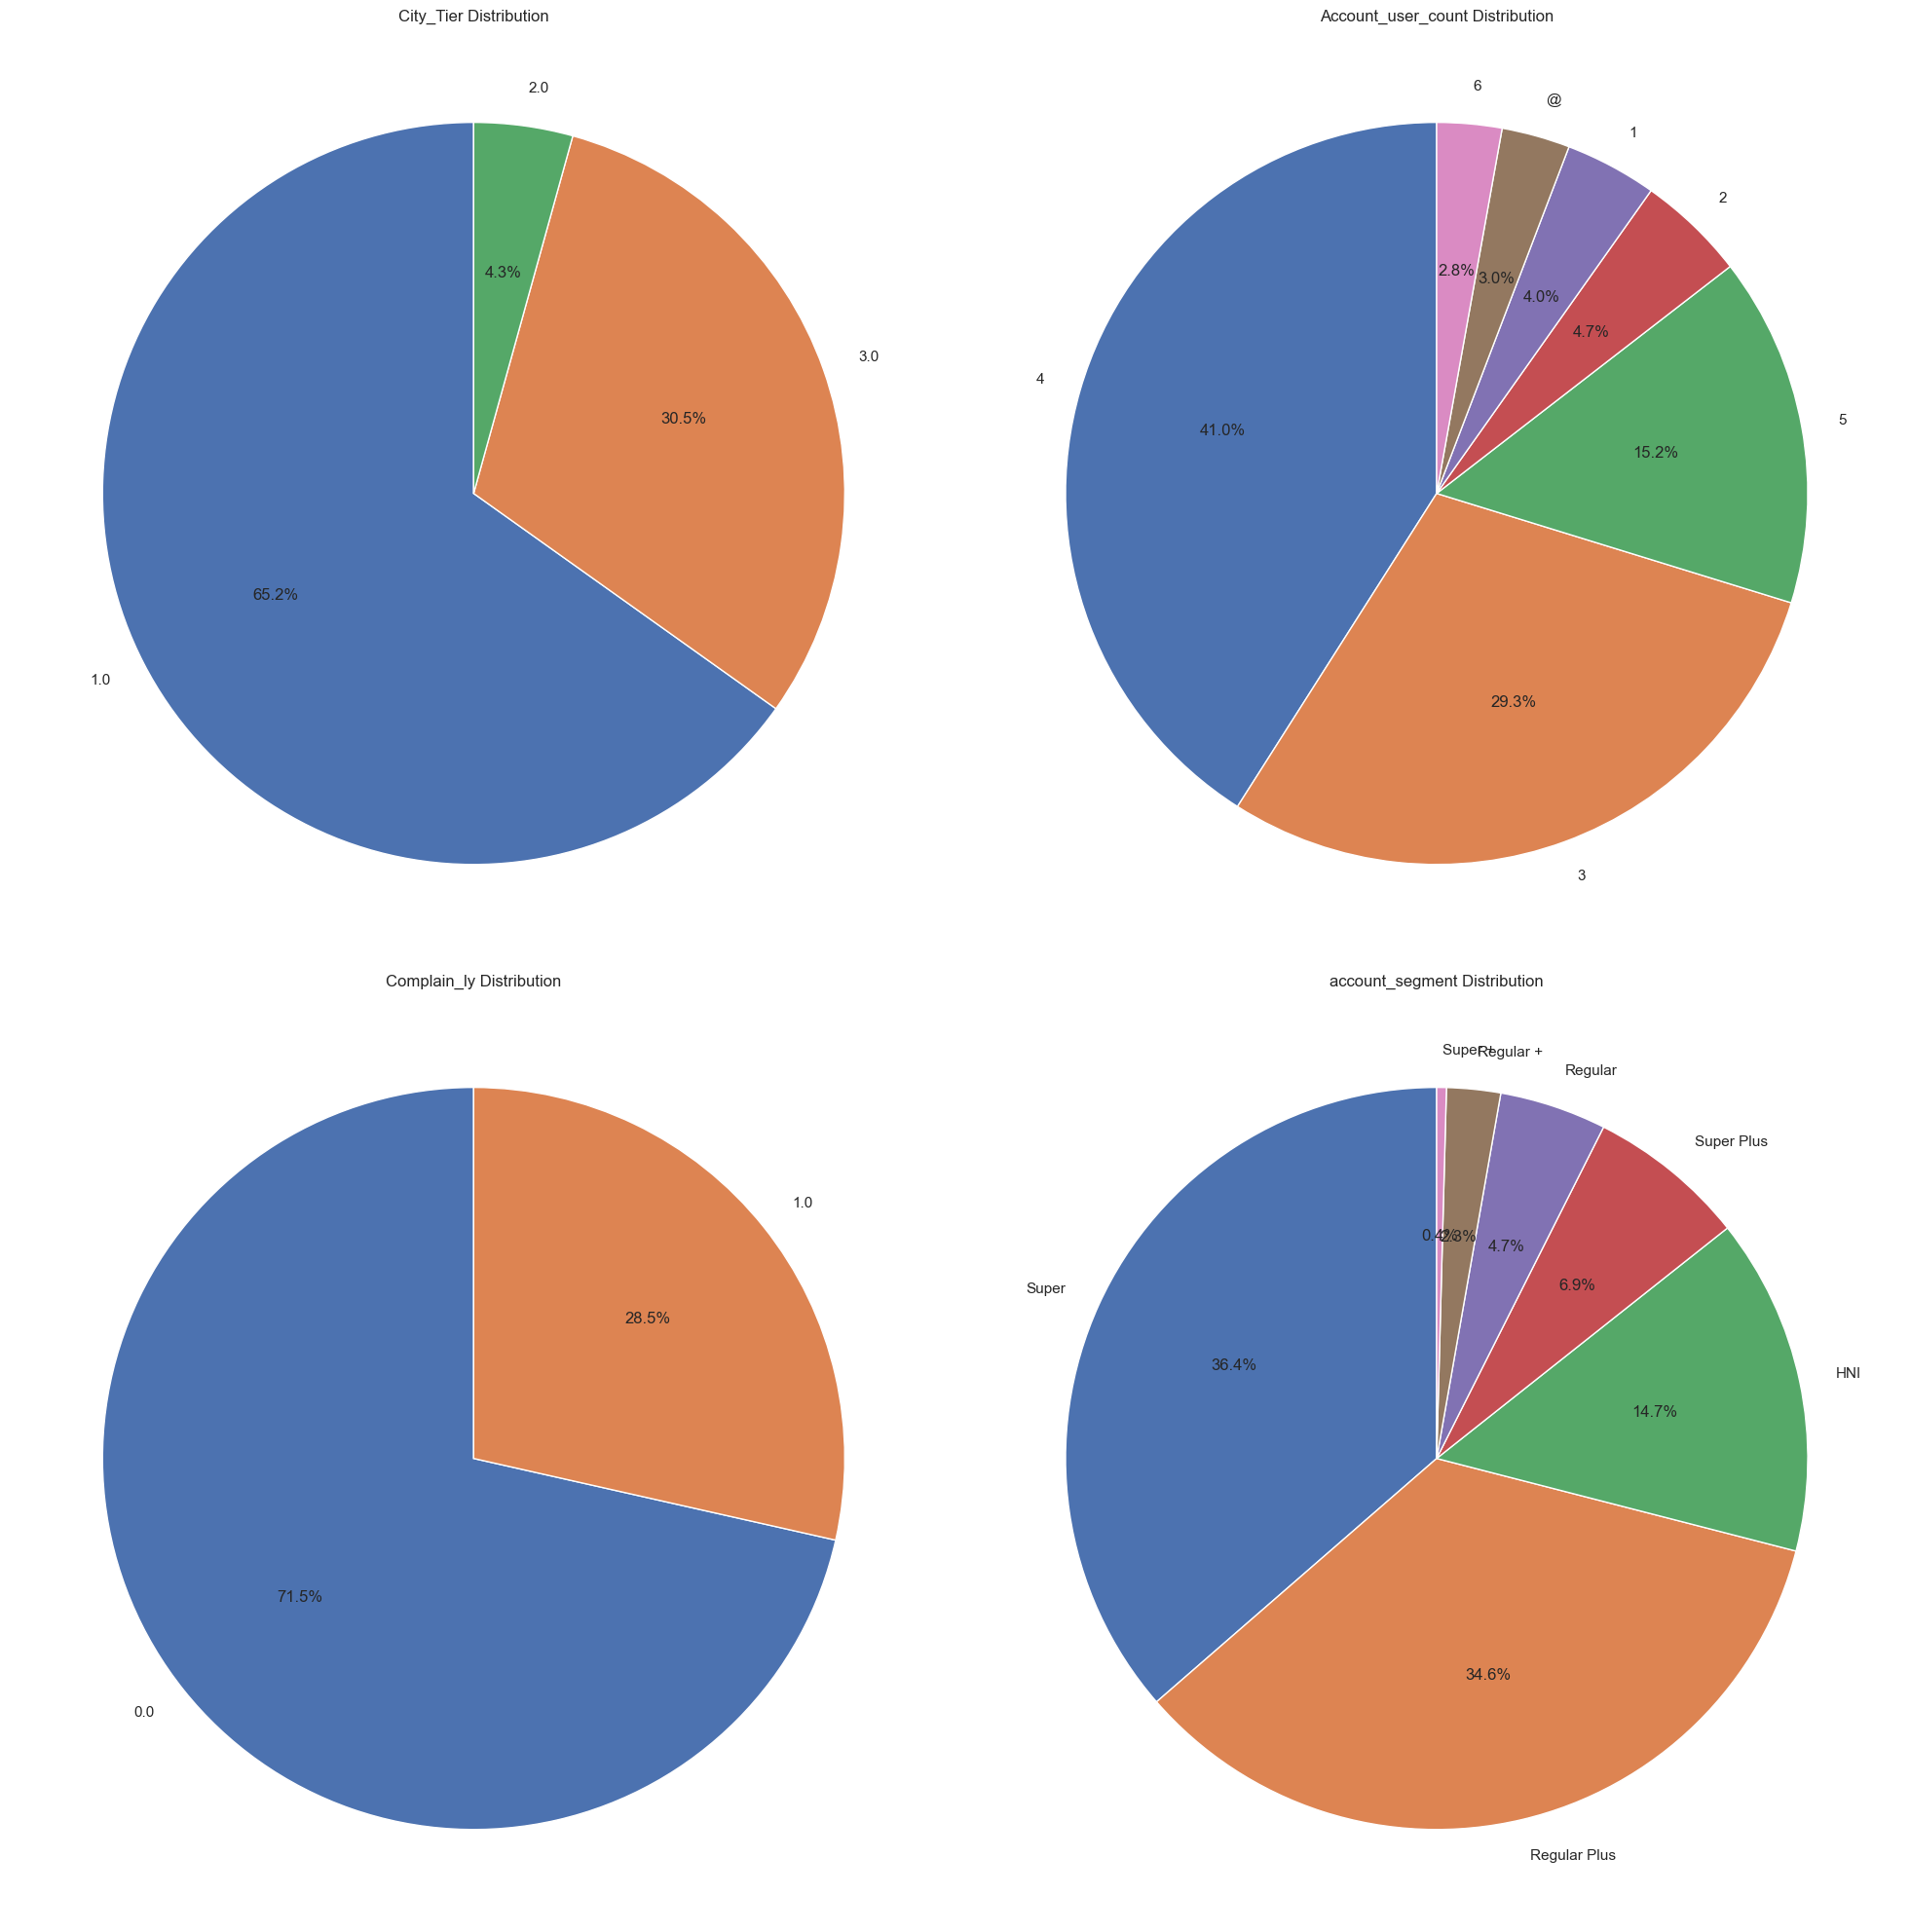

In [10]:
cat_vars = ['City_Tier', 'Account_user_count', 'Complain_ly', 'account_segment', 'CC_Agent_Score', 'Service_Score']

# create a figure and axes
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 20))

# create a pie chart for each categorical variable
for i, var in enumerate(cat_vars):
    if i < len(axs.flat):
        # count the number of occurrences for each category
        cat_counts = df[var].value_counts()

        # create a pie chart
        axs.flat[i].pie(cat_counts, labels=cat_counts.index, autopct='%1.1f%%', startangle=90)

        # set a title for each subplot
        axs.flat[i].set_title(f'{var} Distribution')

# adjust spacing between subplots
fig.tight_layout()

# show the plot
plt.show()

In [11]:
df.head(50)

,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,1,4,3.0,6.0,Debit Card,Female,3.0,3,Super,2.0,Single,9,1.0,11,1,5,160,Mobile
1,1,0,1.0,8.0,UPI,Male,3.0,4,Regular Plus,3.0,Single,7,1.0,15,0,0,121,Mobile
2,1,0,1.0,30.0,Debit Card,Male,2.0,4,Regular Plus,3.0,Single,6,1.0,14,0,3,NaN,Mobile
3,1,0,3.0,15.0,Debit Card,Male,2.0,4,Super,5.0,Single,8,0.0,23,0,3,134,Mobile
4,1,0,1.0,12.0,Credit Card,Male,2.0,3,Regular Plus,5.0,Single,3,0.0,11,1,3,130,Mobile
5,1,0,1.0,22.0,Debit Card,Female,3.0,NaN,Regular Plus,5.0,Single,2,1.0,22,4,7,139,Computer
6,1,2,3.0,11.0,Cash on Delivery,Male,2.0,3,Super,2.0,Divorced,4,0.0,14,0,0,121,Mobile
7,1,0,1.0,6.0,Credit Card,Male,3.0,3,Regular Plus,2.0,Divorced,3,1.0,16,2,0,123,Mobile
8,1,13,3.0,9.0,E wallet,Male,2.0,4,Regular Plus,3.0,Divorced,2,1.0,14,0,2,127,Mobile
9,1,0,1.0,31.0,Debit Card,Male,2.0,5,Regular Plus,3.0,Single,2,0.0,12,1,1,123,Mobile


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Churn                    11260 non-null  int64  
 1   Tenure                   11158 non-null  object 
 2   City_Tier                11148 non-null  float64
 3   CC_Contacted_LY          11158 non-null  float64
 4   Payment                  11151 non-null  object 
 5   Gender                   11152 non-null  object 
 6   Service_Score            11162 non-null  float64
 7   Account_user_count       11148 non-null  object 
 8   account_segment          11163 non-null  object 
 9   CC_Agent_Score           11144 non-null  float64
 10  Marital_Status           11048 non-null  object 
 11  rev_per_month            11158 non-null  object 
 12  Complain_ly              10903 non-null  float64
 13  rev_growth_yoy           11260 non-null  object 
 14  coupon_used_for_paymen

In [13]:
df.head(50)

,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,1,4,3.0,6.0,Debit Card,Female,3.0,3,Super,2.0,Single,9,1.0,11,1,5,160,Mobile
1,1,0,1.0,8.0,UPI,Male,3.0,4,Regular Plus,3.0,Single,7,1.0,15,0,0,121,Mobile
2,1,0,1.0,30.0,Debit Card,Male,2.0,4,Regular Plus,3.0,Single,6,1.0,14,0,3,NaN,Mobile
3,1,0,3.0,15.0,Debit Card,Male,2.0,4,Super,5.0,Single,8,0.0,23,0,3,134,Mobile
4,1,0,1.0,12.0,Credit Card,Male,2.0,3,Regular Plus,5.0,Single,3,0.0,11,1,3,130,Mobile
5,1,0,1.0,22.0,Debit Card,Female,3.0,NaN,Regular Plus,5.0,Single,2,1.0,22,4,7,139,Computer
6,1,2,3.0,11.0,Cash on Delivery,Male,2.0,3,Super,2.0,Divorced,4,0.0,14,0,0,121,Mobile
7,1,0,1.0,6.0,Credit Card,Male,3.0,3,Regular Plus,2.0,Divorced,3,1.0,16,2,0,123,Mobile
8,1,13,3.0,9.0,E wallet,Male,2.0,4,Regular Plus,3.0,Divorced,2,1.0,14,0,2,127,Mobile
9,1,0,1.0,31.0,Debit Card,Male,2.0,5,Regular Plus,3.0,Single,2,0.0,12,1,1,123,Mobile


In [14]:
check_missing = df.isnull().sum() * 100 / df.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

cashback                4.182948
Complain_ly             3.170515
Day_Since_CC_connect    3.170515
Login_device            1.962700
Marital_Status          1.882771
CC_Agent_Score          1.030195
City_Tier               0.994671
Account_user_count      0.994671
Payment                 0.968028
Gender                  0.959147
Tenure                  0.905861
CC_Contacted_LY         0.905861
rev_per_month           0.905861
Service_Score           0.870337
account_segment         0.861456
dtype: float64

In [15]:
df['Tenure'].unique()

array(['4', '0', '2', '13', '11', '#', '9', '99', '19', '20', '14', '8',
       '26', '18', '5', '30', '7', '1', '23', '3', '29', '6', '28', '24',
       '25', '16', '10', '15', '22', nan, '27', '12', '21', '17', '50',
       '60', '31', '51', '61'], dtype=object)

In [16]:
df["Tenure"] = pd.to_numeric(df["Tenure"], errors='coerce')

In [17]:
df['Tenure'].unique()

array([ 4.,  0.,  2., 13., 11., nan,  9., 99., 19., 20., 14.,  8., 26.,
       18.,  5., 30.,  7.,  1., 23.,  3., 29.,  6., 28., 24., 25., 16.,
       10., 15., 22., 27., 12., 21., 17., 50., 60., 31., 51., 61.])

In [18]:
df['City_Tier'].unique()

array([ 3.,  1., nan,  2.])

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Churn                    11260 non-null  int64  
 1   Tenure                   11042 non-null  float64
 2   City_Tier                11148 non-null  float64
 3   CC_Contacted_LY          11158 non-null  float64
 4   Payment                  11151 non-null  object 
 5   Gender                   11152 non-null  object 
 6   Service_Score            11162 non-null  float64
 7   Account_user_count       11148 non-null  object 
 8   account_segment          11163 non-null  object 
 9   CC_Agent_Score           11144 non-null  float64
 10  Marital_Status           11048 non-null  object 
 11  rev_per_month            11158 non-null  object 
 12  Complain_ly              10903 non-null  float64
 13  rev_growth_yoy           11260 non-null  object 
 14  coupon_used_for_paymen

In [20]:
df['CC_Contacted_LY'].unique()

array([  6.,   8.,  30.,  15.,  12.,  22.,  11.,   9.,  31.,  18.,  13.,
        20.,  29.,  28.,  26.,  14.,  10.,  25.,  27.,  17.,  23.,  33.,
        19.,  35.,  24.,  16.,  32.,  21.,  nan,  34.,   5.,   4., 126.,
         7.,  36., 127.,  42.,  38.,  37.,  39.,  40.,  41., 132.,  43.,
       129.])

In [21]:
df['Service_Score'].unique()

array([ 3.,  2.,  1., nan,  0.,  4.,  5.])

In [22]:
df['cashback'].unique()

array(['160', '121', nan, '134', '130', '139', '123', '127', '295', '154',
       '196', '129', '157', '161', '150', '162', '203', '117', '207',
       '142', '173', '190', '143', '1974', '133', '209', '122', '120',
       '194', '126', '299', '125', '187', '131', '111', '205', '145',
       '128', '290', '287', '195', '237', '300', '159', '268', '136',
       '144', '153', '166', '163', '168', '138', '167', '176', '149',
       '204', '185', '200', '225', '236', '189', '222', '206', '0', '179',
       '188', '124', '132', '292', '261', '291', '137', '1955', '164',
       '165', '169', '294', '135', '152', '269', '156', '140', '235',
       '218', '220', '276', '146', '147', '158', '114', '180', '155',
       '260', '112', '221', '148', '219', '271', '1813', '175', '151',
       '293', '283', '215', '171', '183', '1862', '197', '267', '243',
       '1982', '184', '266', '296', '280', '241', '270', '279', '191',
       '198', '141', '232', '174', '262', '216', '119', '282', '254',
     

In [23]:
df["cashback"] = pd.to_numeric(df["cashback"], errors='coerce')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Churn                    11260 non-null  int64  
 1   Tenure                   11042 non-null  float64
 2   City_Tier                11148 non-null  float64
 3   CC_Contacted_LY          11158 non-null  float64
 4   Payment                  11151 non-null  object 
 5   Gender                   11152 non-null  object 
 6   Service_Score            11162 non-null  float64
 7   Account_user_count       11148 non-null  object 
 8   account_segment          11163 non-null  object 
 9   CC_Agent_Score           11144 non-null  float64
 10  Marital_Status           11048 non-null  object 
 11  rev_per_month            11158 non-null  object 
 12  Complain_ly              10903 non-null  float64
 13  rev_growth_yoy           11260 non-null  object 
 14  coupon_used_for_paymen

In [25]:
df['Day_Since_CC_connect'].unique()

array(['5', '0', '3', '7', '2', '1', '8', '6', '4', '15', nan, '11', '10',
       '9', '13', '12', '17', '16', '14', '30', '$', '46', '18', '31',
       '47'], dtype=object)

In [26]:
df["Day_Since_CC_connect"] = pd.to_numeric(df["Day_Since_CC_connect"], errors='coerce')

In [27]:
df['Day_Since_CC_connect'].unique()

array([ 5.,  0.,  3.,  7.,  2.,  1.,  8.,  6.,  4., 15., nan, 11., 10.,
        9., 13., 12., 17., 16., 14., 30., 46., 18., 31., 47.])

In [28]:
df['rev_growth_yoy'].unique()

array(['11', '15', '14', '23', '22', '16', '12', '13', '17', '18', '24',
       '19', '20', '21', '25', '26', '$', '4', '27', '28'], dtype=object)

In [29]:
df["rev_growth_yoy"] = pd.to_numeric(df["rev_growth_yoy"], errors='coerce')

In [30]:
df['rev_growth_yoy'].unique()

array([11., 15., 14., 23., 22., 16., 12., 13., 17., 18., 24., 19., 20.,
       21., 25., 26., nan,  4., 27., 28.])

In [31]:
df['rev_per_month'].unique()

array(['9', '7', '6', '8', '3', '2', '4', '10', '1', '5', '+', '130', nan,
       '19', '139', '102', '120', '138', '127', '123', '124', '116', '21',
       '126', '134', '113', '114', '108', '140', '133', '129', '107',
       '118', '11', '105', '20', '119', '121', '137', '110', '22', '101',
       '136', '125', '14', '13', '12', '115', '23', '122', '117', '131',
       '104', '15', '25', '135', '111', '109', '100', '103'], dtype=object)

In [32]:
df["rev_per_month"] = pd.to_numeric(df["rev_per_month"], errors='coerce')

In [33]:
df['rev_per_month'].unique()

array([  9.,   7.,   6.,   8.,   3.,   2.,   4.,  10.,   1.,   5.,  nan,
       130.,  19., 139., 102., 120., 138., 127., 123., 124., 116.,  21.,
       126., 134., 113., 114., 108., 140., 133., 129., 107., 118.,  11.,
       105.,  20., 119., 121., 137., 110.,  22., 101., 136., 125.,  14.,
        13.,  12., 115.,  23., 122., 117., 131., 104.,  15.,  25., 135.,
       111., 109., 100., 103.])

In [34]:
df['Login_device'].unique()

array(['Mobile', 'Computer', '&&&&', nan], dtype=object)

In [35]:
df['Gender'].unique()

array(['Female', 'Male', 'F', nan, 'M'], dtype=object)

In [36]:
df['account_segment'].unique()

array(['Super', 'Regular Plus', 'Regular', 'HNI', 'Regular +', nan,
       'Super Plus', 'Super +'], dtype=object)

In [37]:
df['Marital_Status'].unique()

array(['Single', 'Divorced', 'Married', nan], dtype=object)

In [38]:
df["Login_device"] = df["Login_device"].replace("&&&&", np.nan)
df["Gender"] = df["Gender"].str.replace('Male', 'M')
df["Gender"] = df["Gender"].str.replace('Female', 'F')
df["account_segment"] = df["account_segment"].str.replace('Regular Plus', 'Regular +')
df["account_segment"] = df["account_segment"].str.replace('Super Plus', 'Super +')

In [39]:
df['Login_device'].unique()

array(['Mobile', 'Computer', nan], dtype=object)

In [40]:
df['Gender'].unique()

array(['F', 'M', nan], dtype=object)

In [41]:
df['account_segment'].unique()

array(['Super', 'Regular +', 'Regular', 'HNI', nan, 'Super +'],
      dtype=object)

In [42]:
df['Marital_Status'].unique()

array(['Single', 'Divorced', 'Married', nan], dtype=object)

In [43]:
df['Payment'].unique()

array(['Debit Card', 'UPI', 'Credit Card', 'Cash on Delivery', 'E wallet',
       nan], dtype=object)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Churn                    11260 non-null  int64  
 1   Tenure                   11042 non-null  float64
 2   City_Tier                11148 non-null  float64
 3   CC_Contacted_LY          11158 non-null  float64
 4   Payment                  11151 non-null  object 
 5   Gender                   11152 non-null  object 
 6   Service_Score            11162 non-null  float64
 7   Account_user_count       11148 non-null  object 
 8   account_segment          11163 non-null  object 
 9   CC_Agent_Score           11144 non-null  float64
 10  Marital_Status           11048 non-null  object 
 11  rev_per_month            10469 non-null  float64
 12  Complain_ly              10903 non-null  float64
 13  rev_growth_yoy           11257 non-null  float64
 14  coupon_used_for_paymen

In [45]:
df['coupon_used_for_payment'].unique()

array(['1', '0', '4', '2', '9', '6', '11', '7', '12', '10', '5', '3',
       '13', '15', '8', '#', '$', '14', '*', '16'], dtype=object)

In [46]:
df["coupon_used_for_payment"] = pd.to_numeric(df["coupon_used_for_payment"], errors='coerce')

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Churn                    11260 non-null  int64  
 1   Tenure                   11042 non-null  float64
 2   City_Tier                11148 non-null  float64
 3   CC_Contacted_LY          11158 non-null  float64
 4   Payment                  11151 non-null  object 
 5   Gender                   11152 non-null  object 
 6   Service_Score            11162 non-null  float64
 7   Account_user_count       11148 non-null  object 
 8   account_segment          11163 non-null  object 
 9   CC_Agent_Score           11144 non-null  float64
 10  Marital_Status           11048 non-null  object 
 11  rev_per_month            10469 non-null  float64
 12  Complain_ly              10903 non-null  float64
 13  rev_growth_yoy           11257 non-null  float64
 14  coupon_used_for_paymen

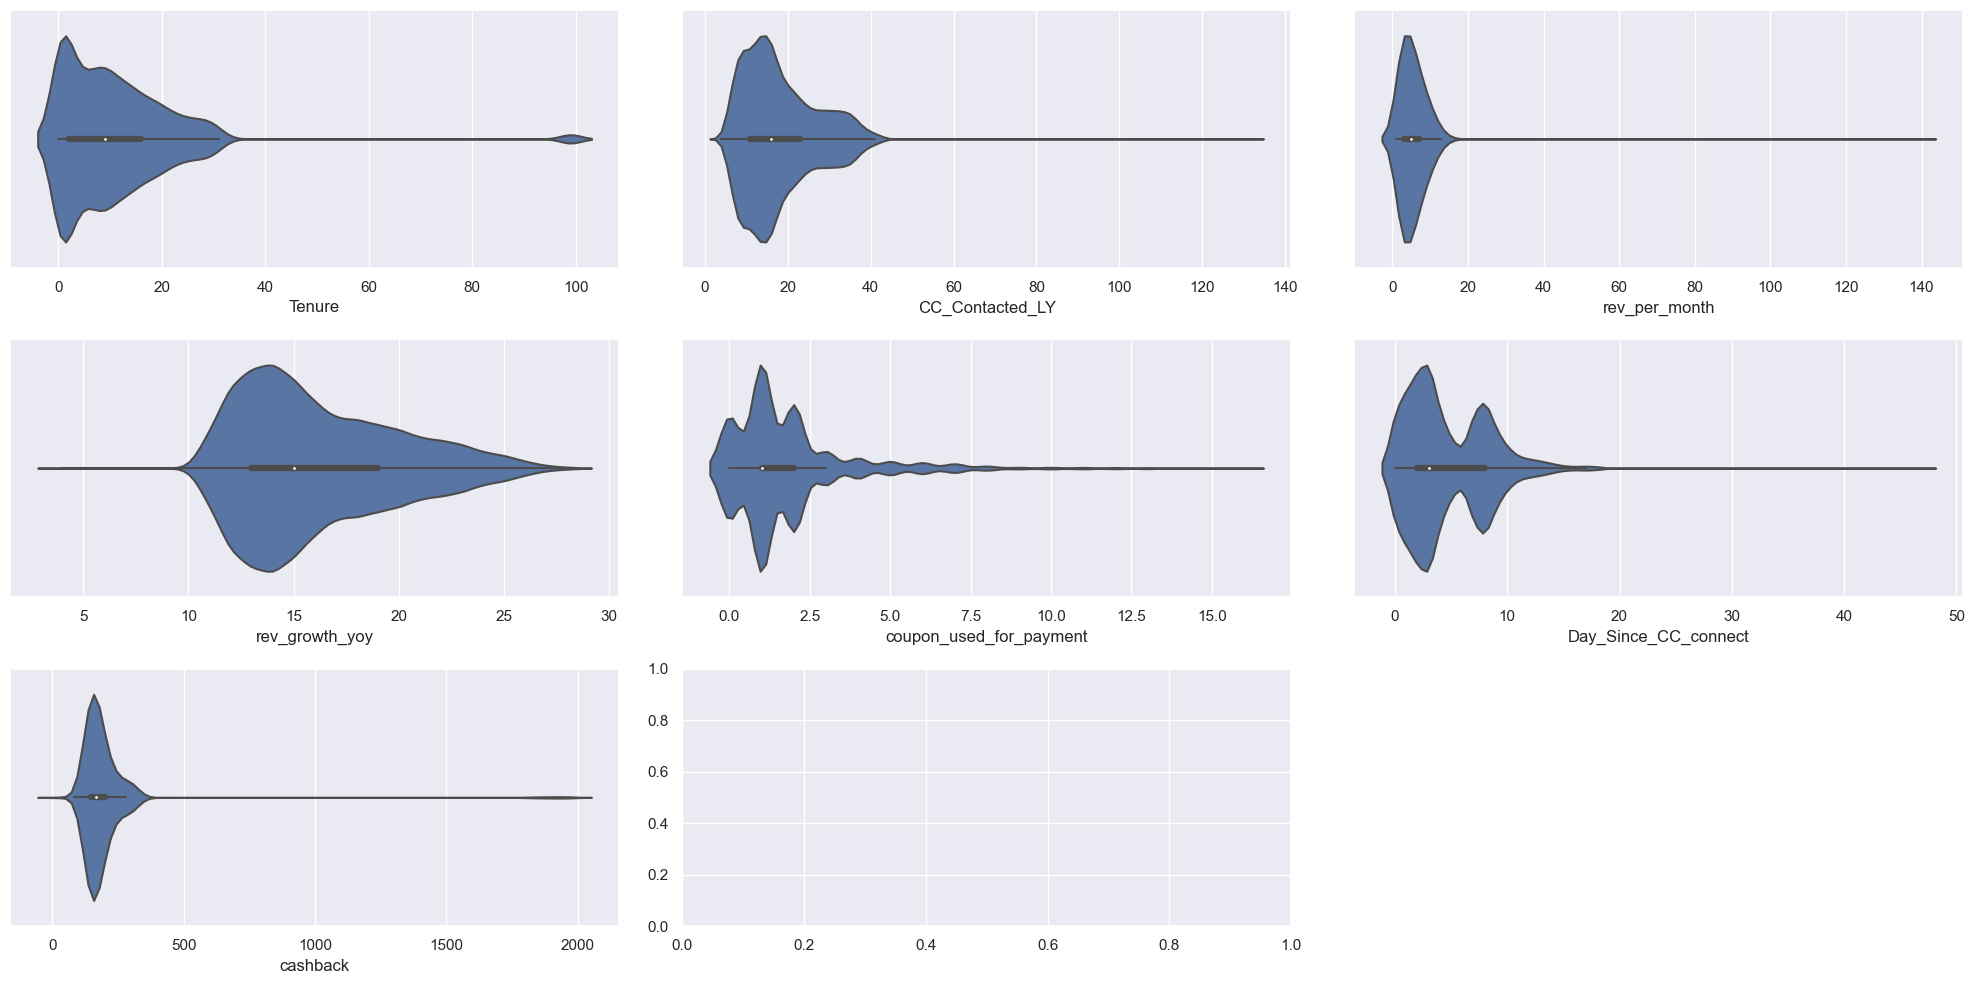

In [48]:
num_vars = ['Tenure', 'CC_Contacted_LY', 'rev_per_month', 'rev_growth_yoy',
           'coupon_used_for_payment', 'Day_Since_CC_connect', 'cashback']

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.violinplot(x=var, data=df, ax=axs[i])

fig.tight_layout()

# remove the ninth subplot
fig.delaxes(axs[8])

plt.show()

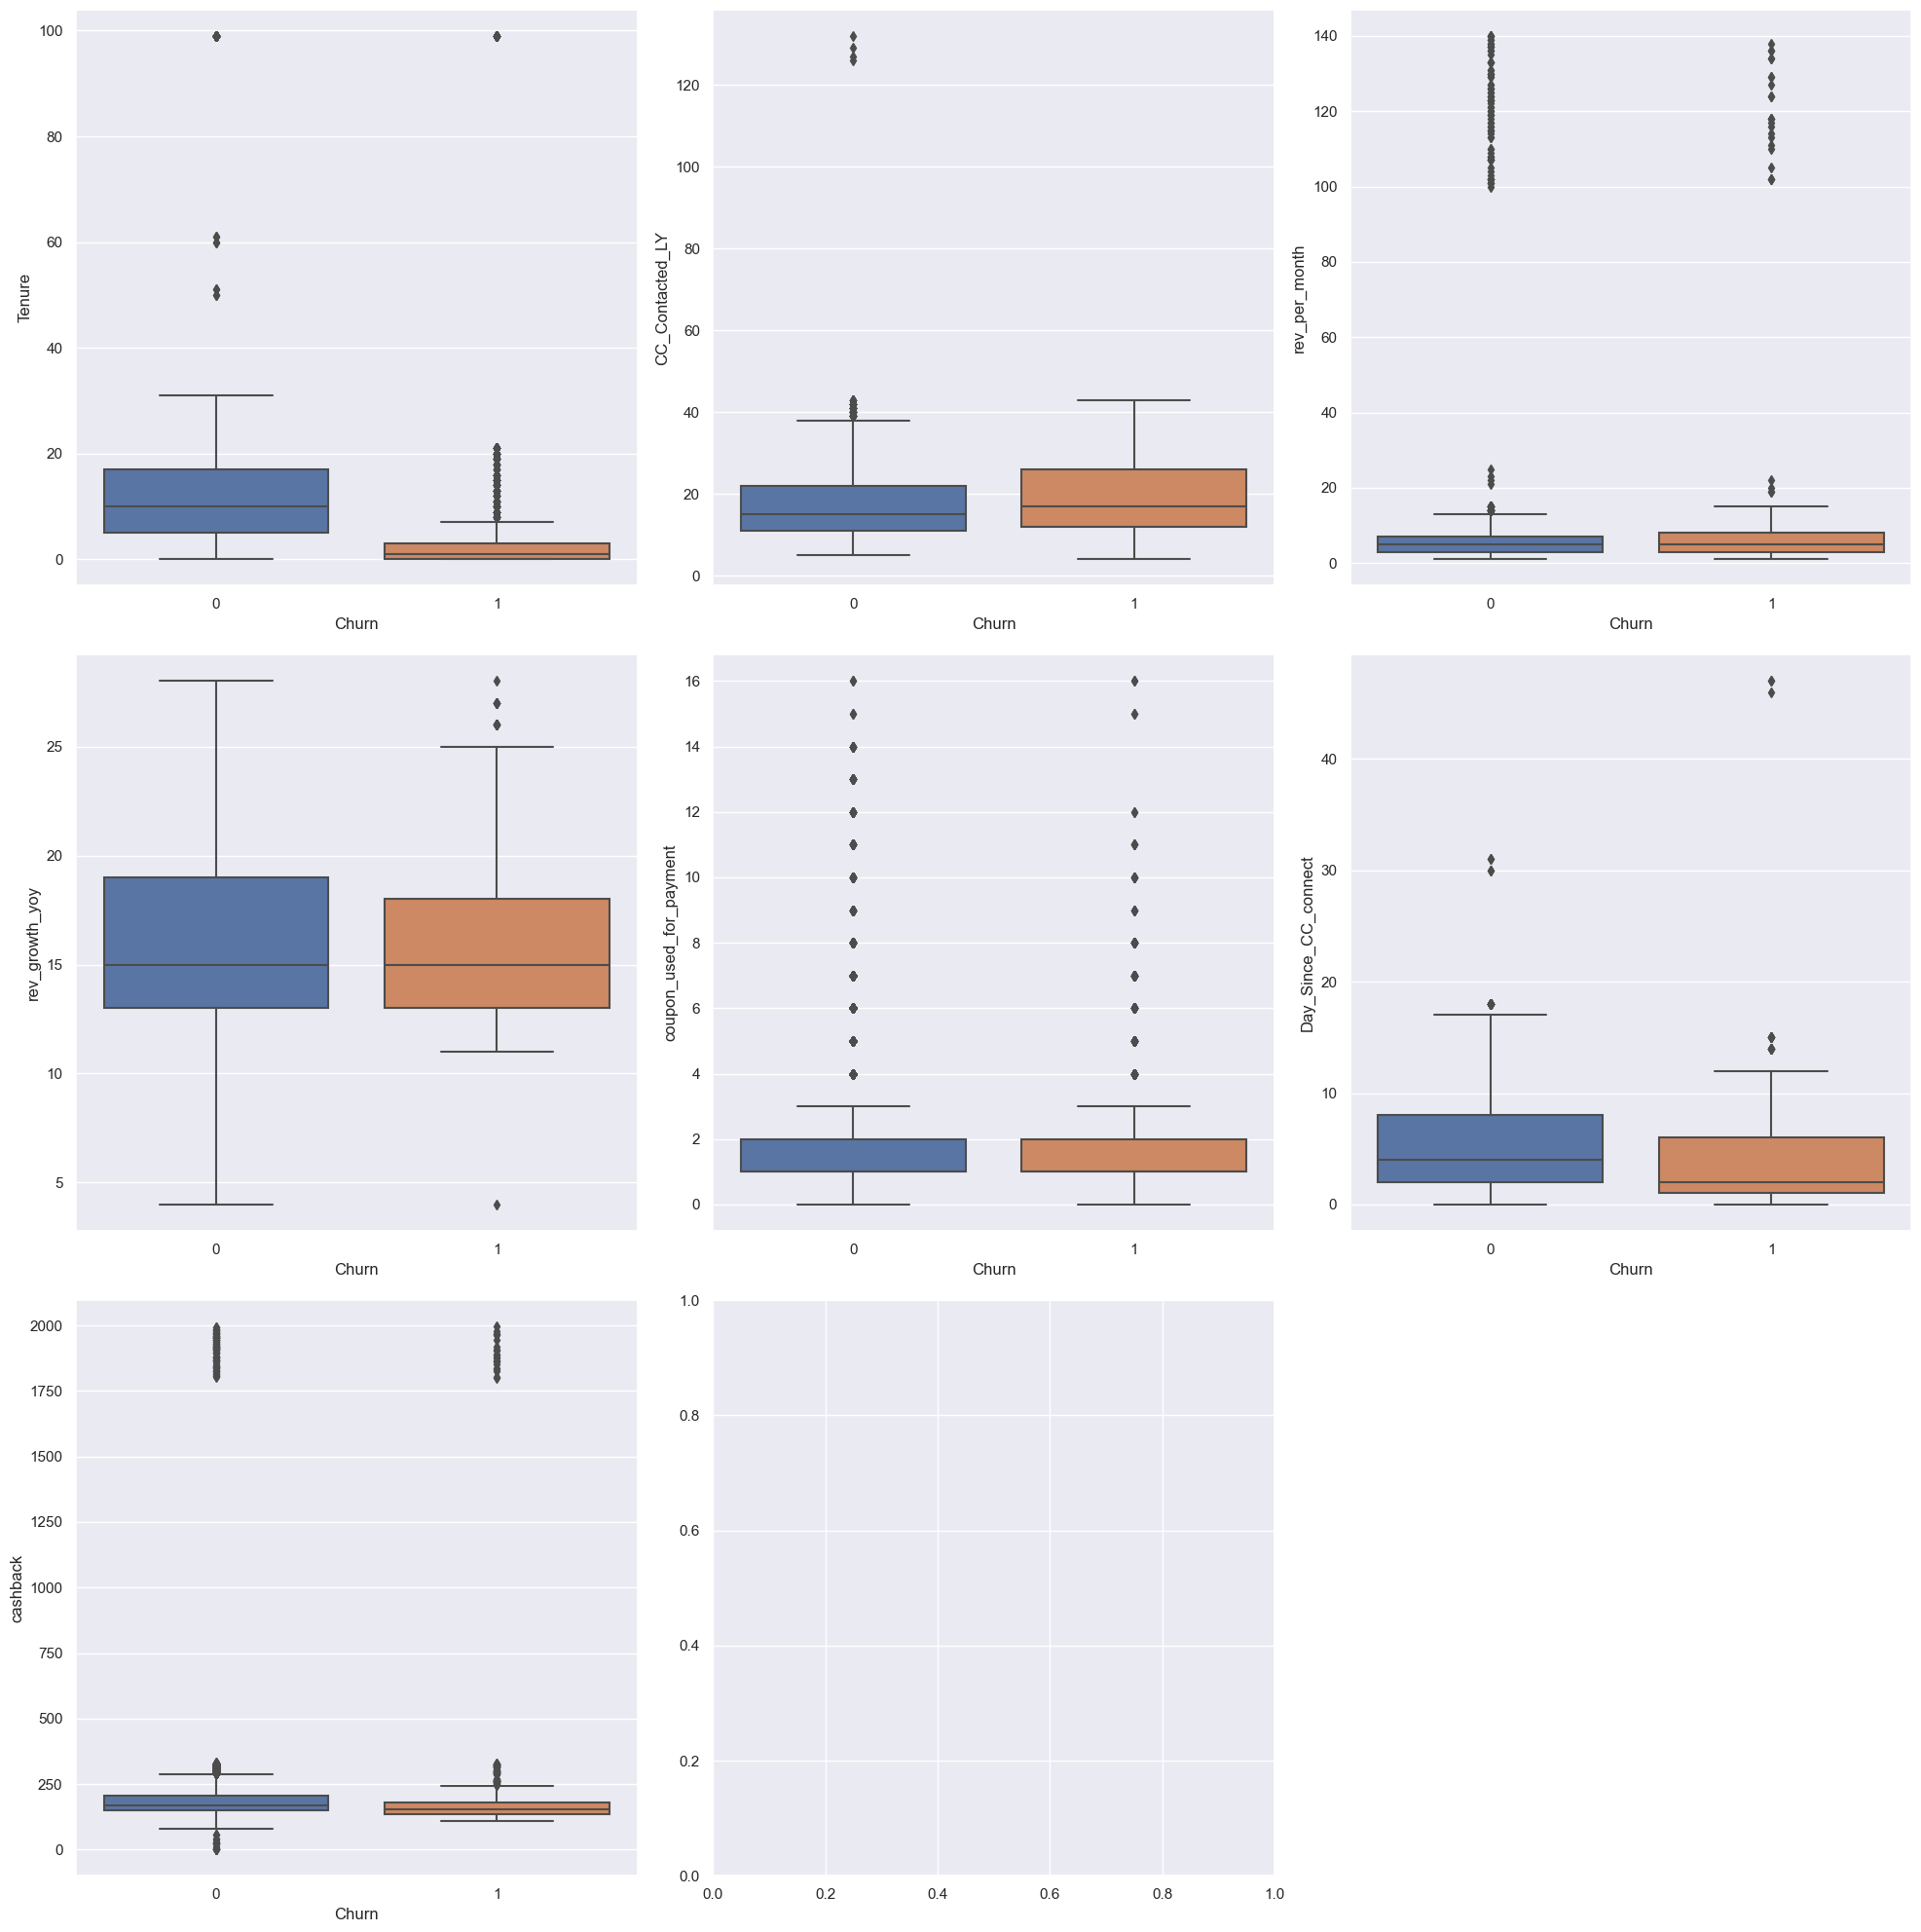

In [49]:
num_vars = ['Tenure', 'CC_Contacted_LY', 'rev_per_month', 'rev_growth_yoy',
           'coupon_used_for_payment', 'Day_Since_CC_connect', 'cashback']

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(20, 20))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.boxplot(y=var, x='Churn', data=df, ax=axs[i])

fig.tight_layout()

# remove the ninth subplot
fig.delaxes(axs[8])

plt.show()

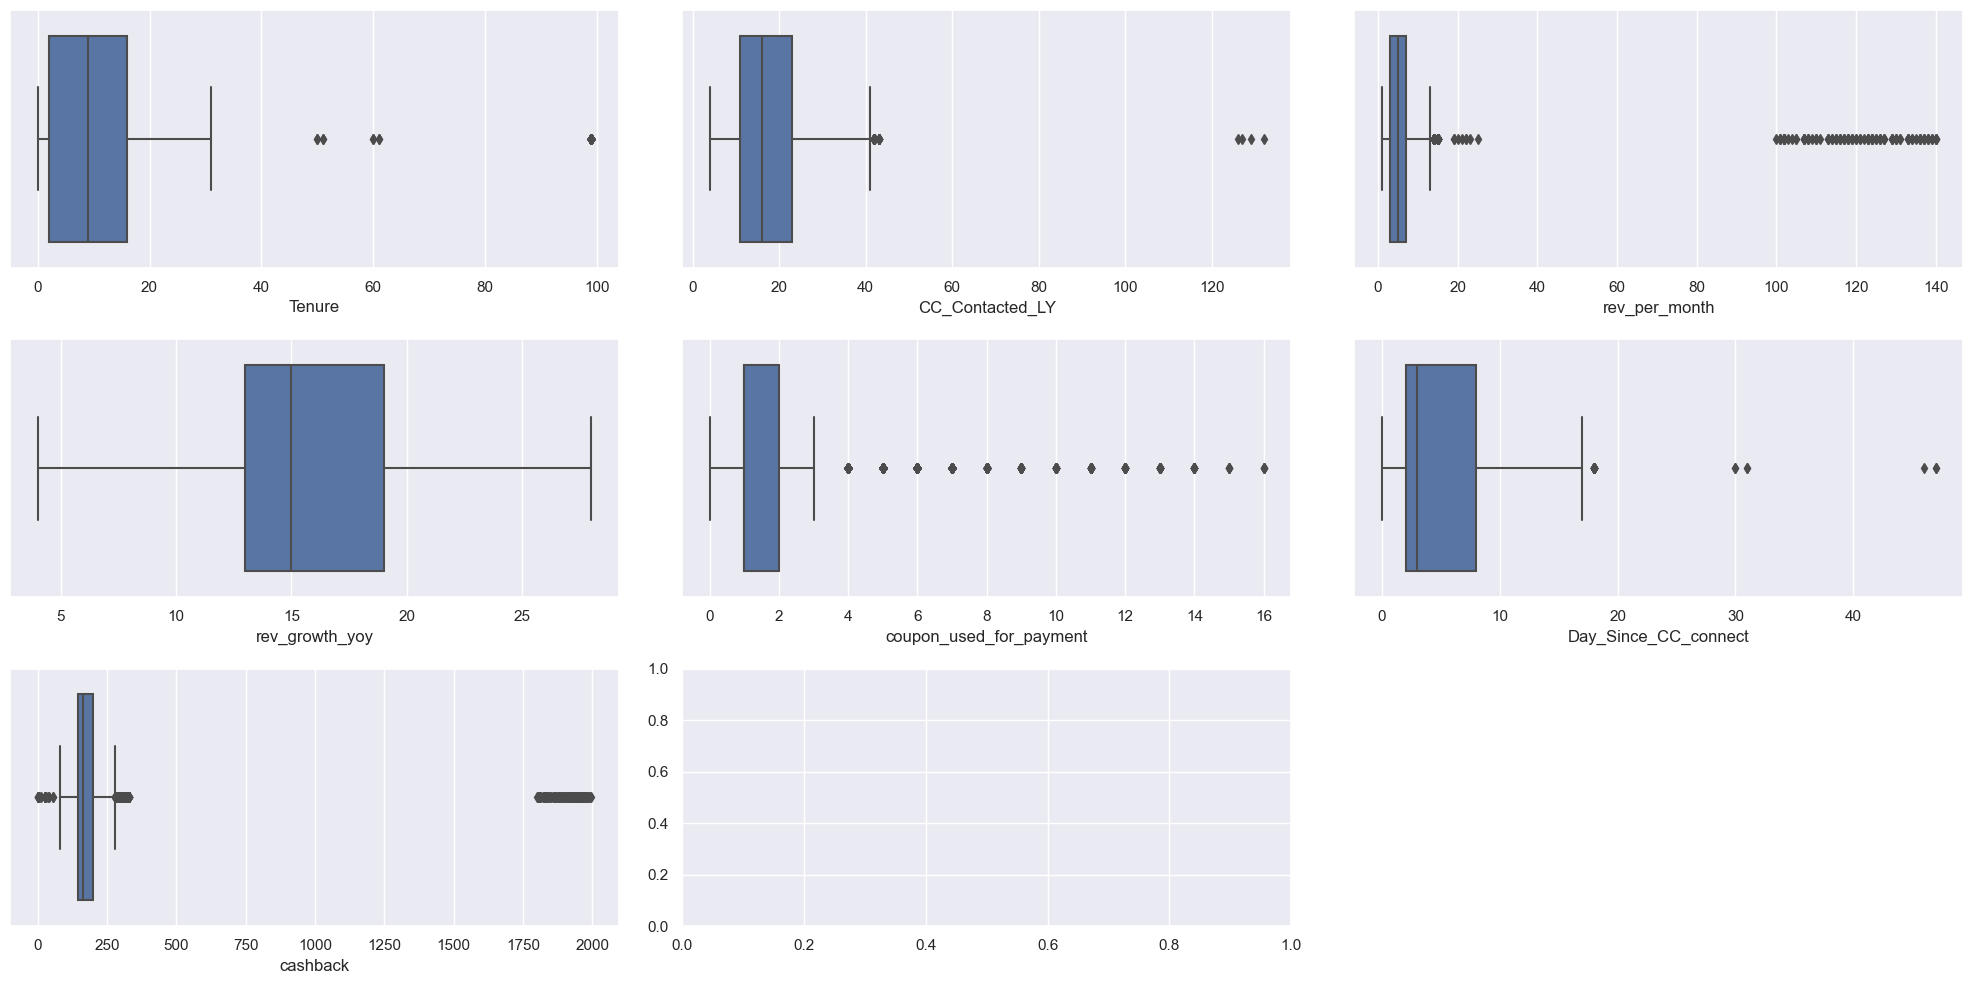

In [50]:
num_vars = ['Tenure', 'CC_Contacted_LY', 'rev_per_month', 'rev_growth_yoy',
           'coupon_used_for_payment', 'Day_Since_CC_connect', 'cashback']


fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.boxplot(x=var, data=df, ax=axs[i])

fig.tight_layout()

# remove the ninth subplot
fig.delaxes(axs[8])

plt.show()

In [51]:
df.isna().sum()

Churn                        0
Tenure                     218
City_Tier                  112
CC_Contacted_LY            102
Payment                    109
Gender                     108
Service_Score               98
Account_user_count         112
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month              791
Complain_ly                357
rev_growth_yoy               3
coupon_used_for_payment      3
Day_Since_CC_connect       358
cashback                   473
Login_device               760
dtype: int64

In [52]:
df['Account_user_count'].unique()

array(['3', '4', nan, '5', '2', '@', '1', '6'], dtype=object)

In [53]:
df["Account_user_count"] = df["Account_user_count"].replace("@", np.nan)

In [54]:
df['Account_user_count'].unique()

array(['3', '4', nan, '5', '2', '1', '6'], dtype=object)

In [55]:
df['CC_Agent_Score'].unique()

array([ 2.,  3.,  5.,  4., nan,  1.])

In [56]:
df['Complain_ly'].unique()

array([ 1.,  0., nan])

In [57]:
df['Tenure'].fillna(df['Tenure'].median(), inplace=True)
df['City_Tier'].fillna(df['City_Tier'].median(), inplace=True)
df['CC_Contacted_LY'].fillna(df['CC_Contacted_LY'].median(), inplace=True)
df['Service_Score'].fillna(df['Service_Score'].median(), inplace=True)
df['CC_Agent_Score'].fillna(df['CC_Agent_Score'].median(), inplace=True)
df['rev_per_month'].fillna(df['rev_per_month'].median(), inplace=True)
df['Complain_ly'].fillna(df['Complain_ly'].median(), inplace=True)
df['rev_growth_yoy'].fillna(df['rev_growth_yoy'].median(), inplace=True)
df['coupon_used_for_payment'].fillna(df['coupon_used_for_payment'].median(), inplace=True)
df['Day_Since_CC_connect'].fillna(df['Day_Since_CC_connect'].median(), inplace=True)
df['cashback'].fillna(df['cashback'].median(), inplace=True)

In [58]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['account_segment'].fillna(df['account_segment'].mode()[0], inplace=True)
df['Marital_Status'].fillna(df['Marital_Status'].mode()[0], inplace=True)
df['Payment'].fillna(df['Payment'].mode()[0], inplace=True)
df['Account_user_count'].fillna(df['Account_user_count'].mode()[0], inplace=True)
df['Login_device'].fillna(df['Login_device'].mode()[0], inplace=True)
df['Account_user_count'].fillna(df['Account_user_count'].mode()[0], inplace=True)

In [59]:
check_missing = df.isnull().sum() * 100 / df.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

Series([], dtype: float64)

In [60]:
df.isna().sum()

Churn                      0
Tenure                     0
City_Tier                  0
CC_Contacted_LY            0
Payment                    0
Gender                     0
Service_Score              0
Account_user_count         0
account_segment            0
CC_Agent_Score             0
Marital_Status             0
rev_per_month              0
Complain_ly                0
rev_growth_yoy             0
coupon_used_for_payment    0
Day_Since_CC_connect       0
cashback                   0
Login_device               0
dtype: int64

In [61]:
# Loop over each column in the DataFrame where dtype is 'object'
for col in df.select_dtypes(include=['object']).columns:
    
    # Print the column name and the unique values
    print(f"{col}: {df[col].unique()}")

Payment: ['Debit Card' 'UPI' 'Credit Card' 'Cash on Delivery' 'E wallet']
Gender: ['F' 'M']
Account_user_count: ['3' '4' '5' '2' '1' '6']
account_segment: ['Super' 'Regular +' 'Regular' 'HNI' 'Super +']
Marital_Status: ['Single' 'Divorced' 'Married']
Login_device: ['Mobile' 'Computer']


In [62]:
from sklearn import preprocessing

# Loop over each column in the DataFrame where dtype is 'object'
for col in df.select_dtypes(include=['object']).columns:
    
    # Initialize a LabelEncoder object
    label_encoder = preprocessing.LabelEncoder()
    
    # Fit the encoder to the unique values in the column
    label_encoder.fit(df[col].unique())
    
    # Transform the column using the encoder
    df[col] = label_encoder.transform(df[col])
    
    # Print the column name and the unique encoded values
    print(f"{col}: {df[col].unique()}")

Payment: [2 4 1 0 3]
Gender: [0 1]
Account_user_count: [2 3 4 1 0 5]
account_segment: [3 2 1 0 4]
Marital_Status: [2 0 1]
Login_device: [1 0]


<Axes: >

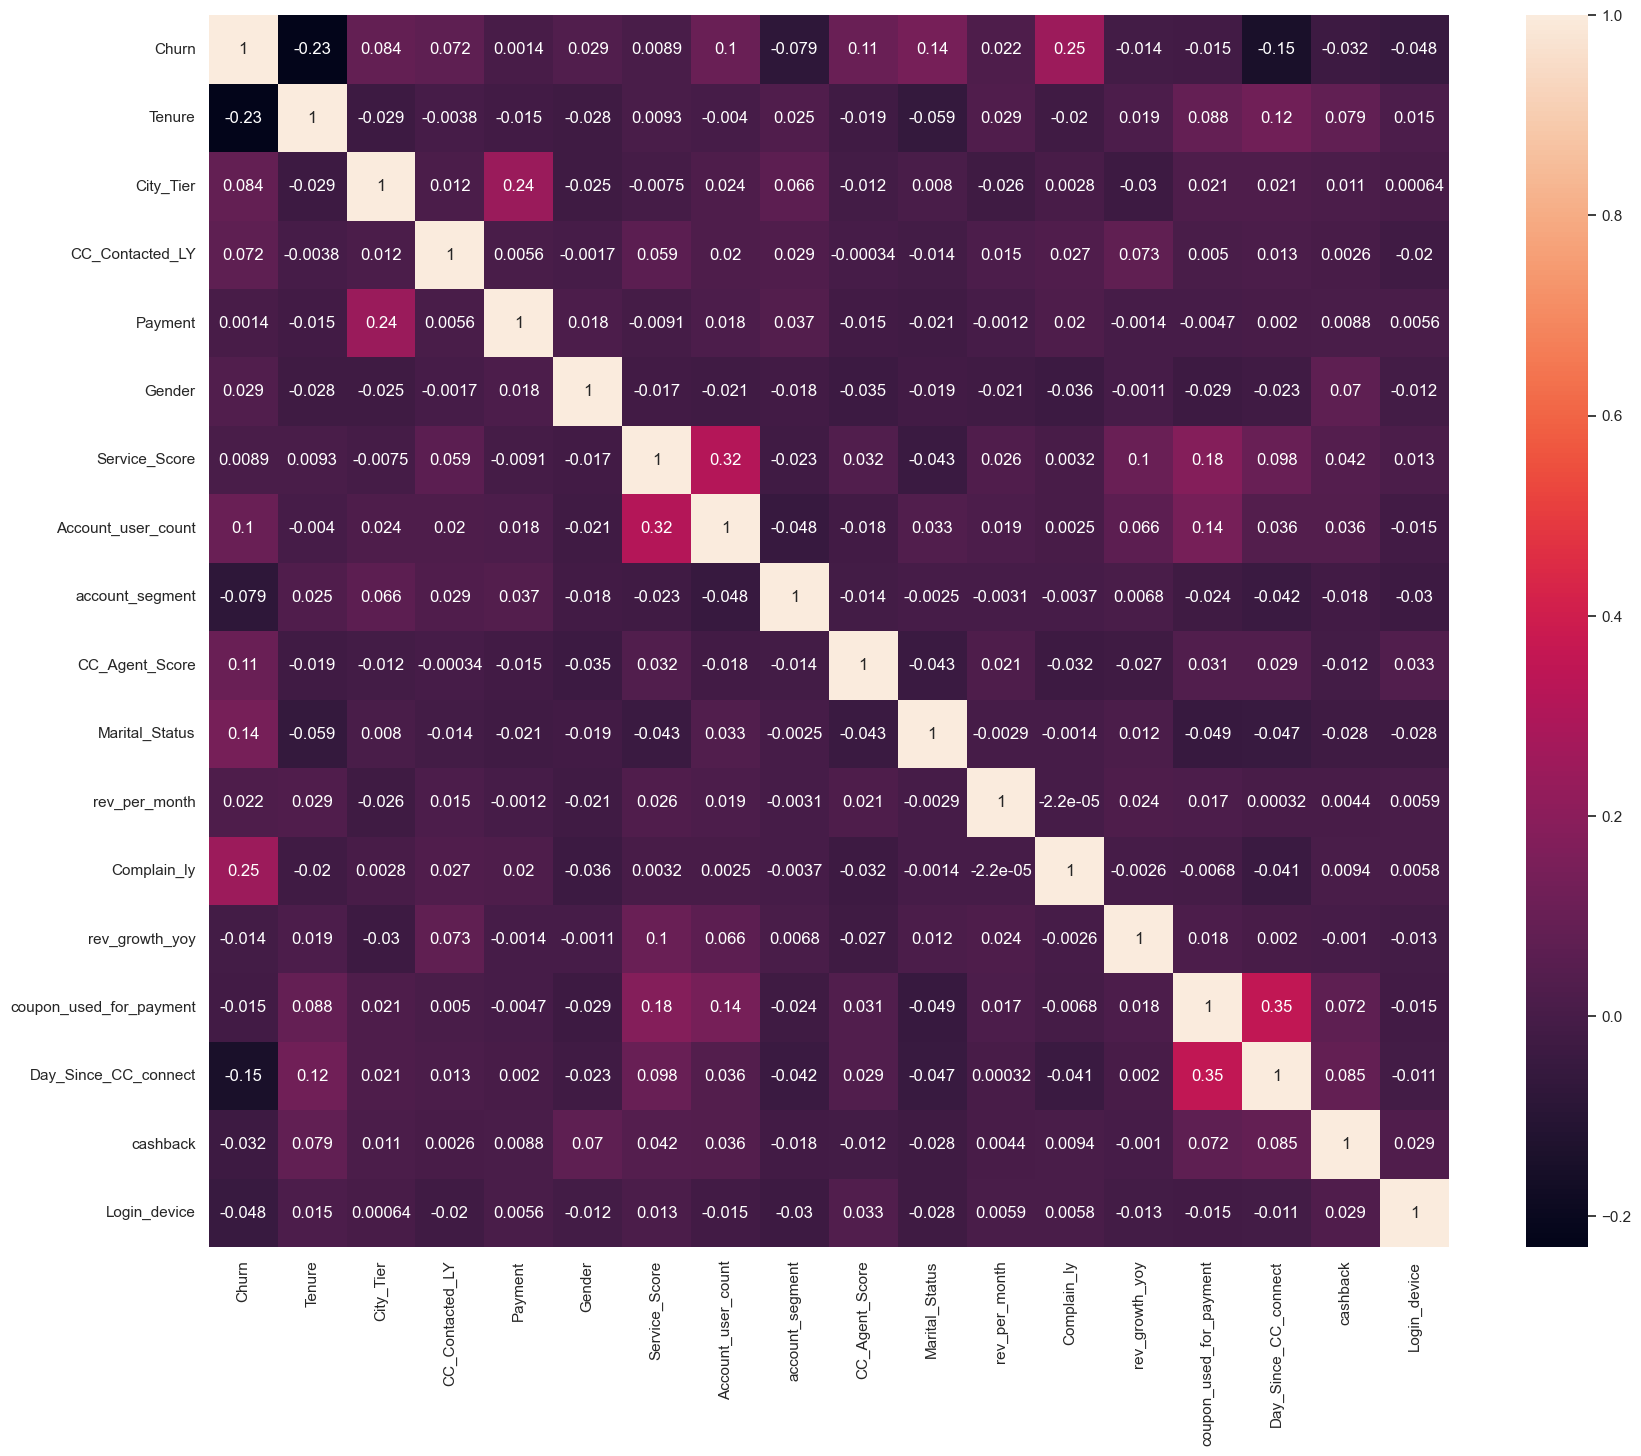

In [63]:
plt.figure(figsize=(20, 16))
sns.heatmap(df.corr(), fmt='.2g', annot=True)

In [64]:
from sklearn.model_selection import train_test_split
# Select the features (X) and the target variable (y)
X = df.drop('Churn', axis=1)
y = df['Churn']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
from sklearn.model_selection import train_test_split

# Select the column for outlier removal
selected_column = ['Tenure', 'CC_Contacted_LY', 'rev_per_month', 'coupon_used_for_payment']

# Split the data into training and test sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Calculate the z-scores for the selected column in the training set
train_z_scores = np.abs((train_df[selected_column] - train_df[selected_column].mean()) / train_df[selected_column].std())

# Set the threshold for defining outliers (e.g., z-score > 3)
threshold = 3

# Filter the training DataFrame, removing rows with z-scores above the threshold in the selected column
train_df_no_outliers = train_df[train_z_scores <= threshold]

In [66]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
dtree = DecisionTreeClassifier(class_weight='balanced')
param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3, 4],
    'random_state': [0, 42]
}

# Perform a grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(dtree, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

{'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 3, 'random_state': 42}


In [67]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=42, max_depth=8, min_samples_leaf=1, min_samples_split=2, class_weight='balanced')
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=8, random_state=42)

In [68]:
from sklearn.metrics import accuracy_score
y_pred = dtree.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 84.72 %


In [69]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score, log_loss
print('F-1 Score : ',(f1_score(y_test, y_pred, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred, average='micro')))
print('Jaccard Score : ',(jaccard_score(y_test, y_pred, average='micro')))
print('Log Loss : ',(log_loss(y_test, y_pred)))

F-1 Score :  0.847246891651865
Precision Score :  0.8472468916518651
Recall Score :  0.8472468916518651
Jaccard Score :  0.7349768875192604
Log Loss :  5.505780091410435


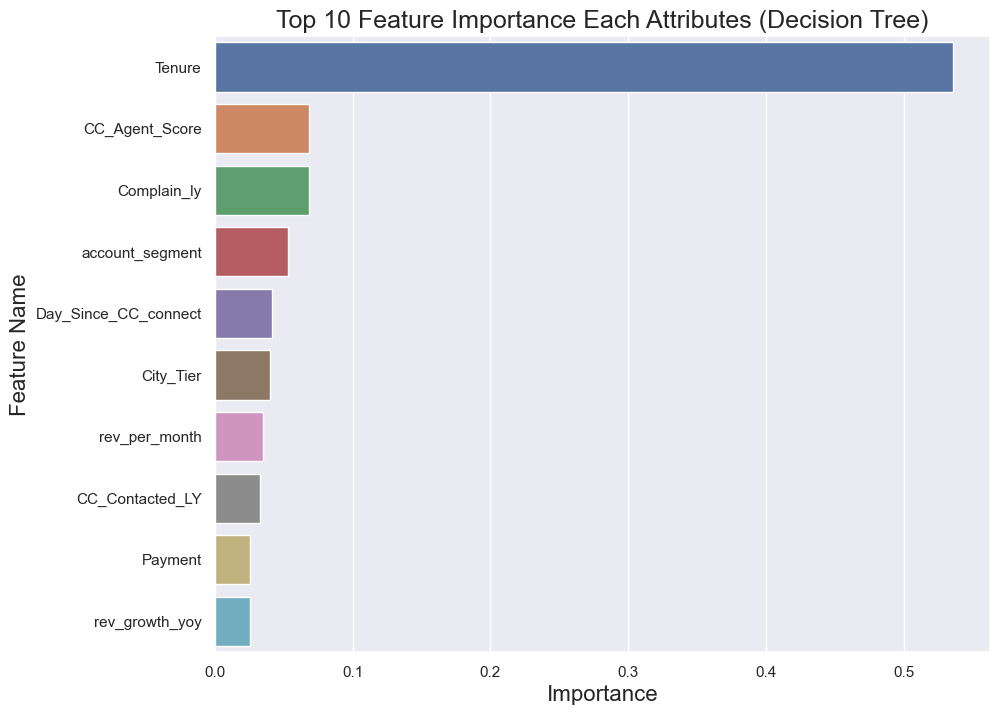

In [70]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": dtree.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Top 10 Feature Importance Each Attributes (Decision Tree)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

Text(0.5, 1.0, 'Accuracy Score for Decision Tree: 0.8472468916518651')

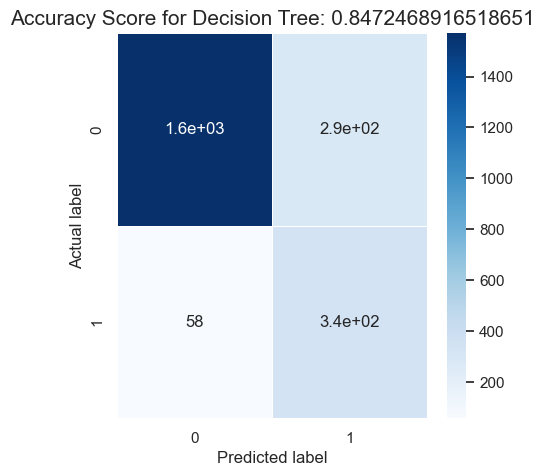

In [71]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score for Decision Tree: {0}'.format(dtree.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

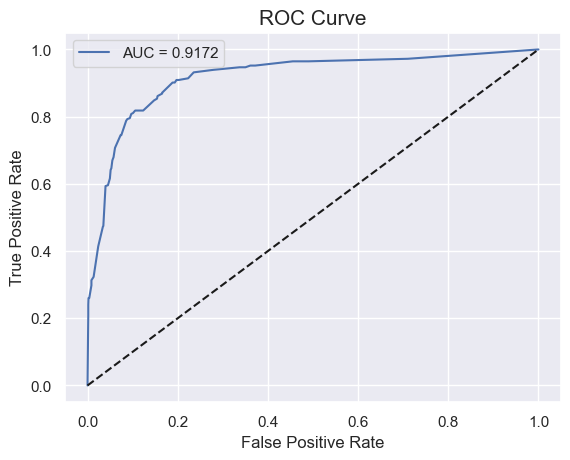

In [72]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = dtree.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 15)
plt.legend()

In [73]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rfc = RandomForestClassifier(class_weight='balanced')
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'max_features': ['sqrt', 'log2', None],
    'random_state': [0, 42]
}

# Perform a grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(rfc, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

{'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 100, 'random_state': 0}


In [74]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0, max_features='sqrt', n_estimators=100, class_weight='balanced')
rfc.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=0)

In [75]:
y_pred = rfc.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 96.98 %


In [76]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score, log_loss
print('F-1 Score : ',(f1_score(y_test, y_pred, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred, average='micro')))
print('Jaccard Score : ',(jaccard_score(y_test, y_pred, average='micro')))
print('Log Loss : ',(log_loss(y_test, y_pred)))

F-1 Score :  0.9698046181172292
Precision Score :  0.9698046181172292
Recall Score :  0.9698046181172292
Jaccard Score :  0.9413793103448276
Log Loss :  1.0883518785346211


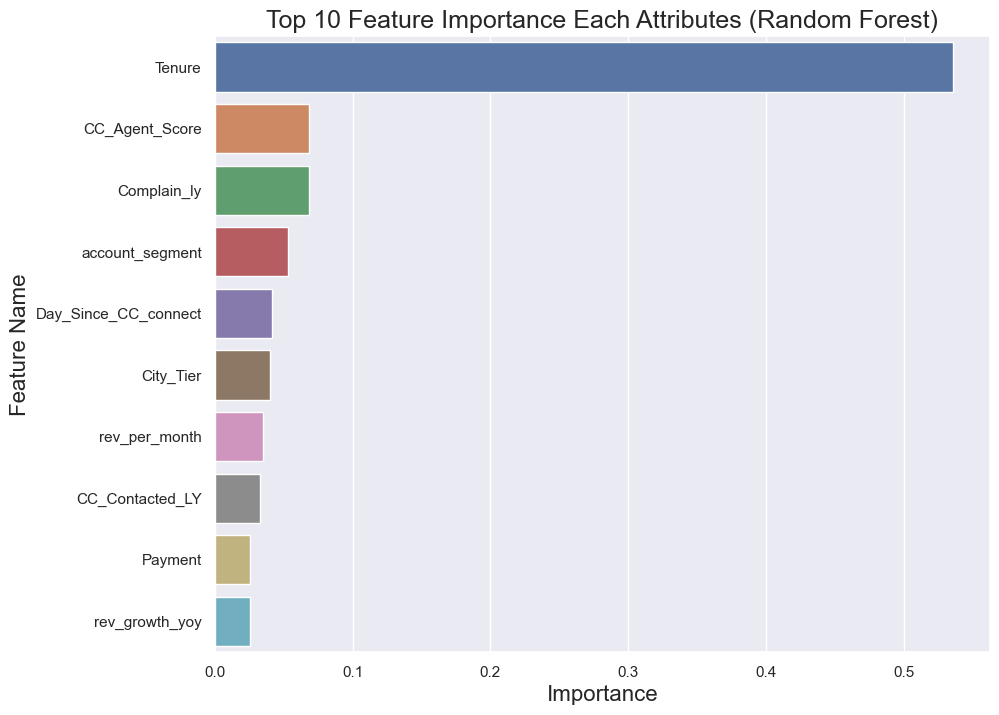

In [77]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": dtree.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Top 10 Feature Importance Each Attributes (Random Forest)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

Text(0.5, 1.0, 'Accuracy Score for Random Forest: 0.9698046181172292')

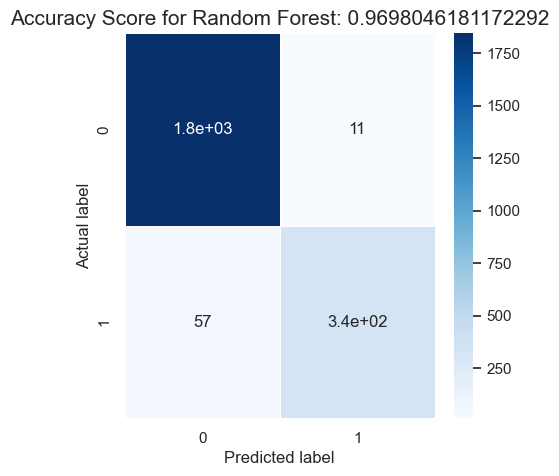

In [78]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score for Random Forest: {0}'.format(rfc.score(X_test, y_test))
plt.title(all_sample_title, size = 15)